<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/SERIES_GENERALIZADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SERIES DE FOURIER GENERALIZADAS**

**A) Verificar si es un problema de Sturm-Lioville**


La forma estandar es
$$ f´´ + 2f´ + λf = 0, \hspace{2.0cm} 0<x<1 $$
$$ f(0) = 0, \hspace{1.0cm} f(1) = 0 $$
en este caso su intervalo es
$$
[ 0,1]
$$
con coeficientes
$$p(x) = e^{2x} \hspace{1.0cm} q(x)=0 \hspace{1.0cm} r(x) = e^{2x}  \frac{1}{2}$$
las condiciones
$$f(0) = 0 \hspace{4.0cm} f(1) = 0$$
de la primera se tiene
$$ k_1 = 1 \hspace{1.0cm} \text{&} \hspace{1.0cm} k_2 = 0$$
de la segunda condición
$$ k_3 = 1 \hspace{1.0cm} \text{&} \hspace{1.0cm} k_4 = 0$$

$$ \therefore \text{Este sí es un problema de Sturm-louville}$$

Resolviendo la ecuación diferencial

La EDO del problema es

$$f´´ + 2f´ + λf = 0, \hspace{2.0cm} 0<x<1 $$

con ecuación característica
$$ r^2 + 2r + λf = 0 $$

con raíces
$$ r_1 = -1 + \sqrt{1- \lambda } $$
$$ r_2 = -1 - \sqrt{1- \lambda } $$

veamos los casos


*   **CASO 1:** $λ <1$
*   **CASO 2:** $λ =1$
*   **CASO 3:** $λ >1$

Encontrando los valores propios, usaremos $λ >1$ pues nos interesan los valores propios positivos. Con solución general en este caso

$$f(x) = e^{-x} (C_1 cos(\mu x) + C_2 sen (\mu x)) $$

aplicando las condiciones de frontera se tiene que


*   La autofunción es:
$$f_n (x) = e^{-x} sen(n\pi x) $$
*   Valores propios
$$λ _n = 1+ (n\pi)^2$$



b) Usar las eigenfunciones (autofunciones) de este problema para expandir en series de Fourier generalizadas de la función

$$u(x) = e^{-x} $$

usando las autofunciones $f_n$ con peso $r(x)$, la expansión es
$$u(x) = \sum _{n=1} ^{∞} C_n f_n (x)$$

calculando los coeficientes $C_n$ se tiene que

$$C_n = \frac{\frac{1-(-1)^n}{n\pi}}{1/2} = \frac{2(1-(-1)^n}{n\pi} $$

$$ \therefore \text{La serie final} \hspace{1.0cm} u(x) = e^{-x} = ∑_{n=1} ^{∞} C_n e^{-x} sen (n\pi x) $$

Coeficiente c_n:
  ⎛        n⎞
2⋅⎝1 - (-1) ⎠
─────────────
     π⋅n     


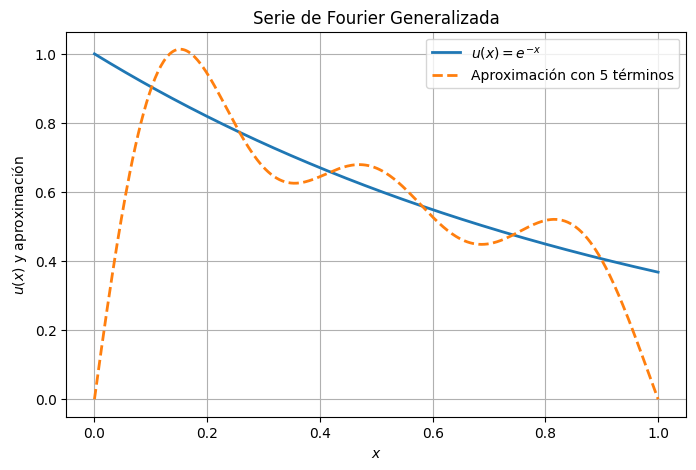

In [6]:
# Importar librerías
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# =======================
# Inciso (a)
# Resolver problema de Sturm-Liouville
# =======================

# Definimos las variables y la función
x, lam = sp.symbols('x lambda', real=True)
f = sp.Function('f')(x)

# Definimos la EDO
edo = sp.Eq(f.diff(x, 2) + 2*f.diff(x) + lam*f, 0)

# Resolver la EDO
sol = sp.dsolve(edo, f)
C1, C2 = sp.symbols('C1 C2')
general_solution = sol.rhs

# Definir raíces de la ecuación característica
r = sp.symbols('r')
char_eq = sp.Eq(r**2 + 2*r + lam, 0)
roots = sp.solve(char_eq, r)

# Suponemos λ > 1 (raíces complejas) → λ = 1 + μ², μ > 0
mu = sp.symbols('mu', positive=True, real=True)
lam_sub = 1 + mu**2

# Sustituyendo en la solución general
f_sol = sp.exp(-x) * (C1 * sp.cos(mu * x) + C2 * sp.sin(mu * x))

# Condiciones de frontera
eq1 = sp.Eq(f_sol.subs(x,0), 0)
eq2 = sp.Eq(f_sol.subs(x,1), 0)

# Aplicar f(0)=0 → C1 = 0
C1_sol = 0
f_sol = sp.exp(-x) * (C2 * sp.sin(mu * x))

# Condición f(1)=0 → sin(mu) = 0 → mu = n*pi
n = sp.symbols('n', integer=True, positive=True)
mu_n = n * sp.pi
lam_n = 1 + (n * sp.pi)**2

# Autofunción f_n(x)
fn = sp.exp(-x) * sp.sin(n * sp.pi * x)

# =======================
# Inciso (b)
# Expansión en serie de Fourier generalizada
# =======================

# Definir u(x) y peso r(x)
u = sp.exp(-x)
r = sp.exp(2*x)

# Cálculo de coeficientes c_n
numerador = sp.integrate(u * fn * r, (x, 0, 1))
denominador = sp.integrate(fn**2 * r, (x, 0, 1))
cn = sp.simplify(numerador / denominador)

# Mostrar expresión de c_n
print("Coeficiente c_n:")
print(sp.pretty(cn, use_unicode=True))

# ================
# Graficar función original y aproximación de Fourier
# ================

# Convertimos a funciones numéricas
u_lambd = sp.lambdify(x, u, 'numpy')

def f_numerica(n_val, x_vals):
    # Indented this line to be inside the function body
    return np.exp(-x_vals) * np.sin(n_val * np.pi * x_vals)

def c_numerico(n_val):
    expr = cn.subs(n, n_val)
    return float(expr.evalf())

# Dominio x
x_vals = np.linspace(0, 1, 400)
u_vals = u_lambd(x_vals)

# Aproximación de la serie (N términos)
N = 5
approx_vals = np.zeros_like(x_vals)

for k in range(1, N+1):
    # Indented these lines to be inside the for loop
    ck = c_numerico(k)
    fk = f_numerica(k, x_vals)
    approx_vals += ck * fk

# Graficar
plt.figure(figsize=(8,5))
plt.plot(x_vals, u_vals, label=r'$u(x) = e^{-x}$', linewidth=2)
plt.plot(x_vals, approx_vals, label=f'Aproximación con {N} términos', linestyle='--', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$u(x)$ y aproximación')
plt.title('Serie de Fourier Generalizada')
plt.legend()
plt.grid(True)
plt.show()